In [24]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian
from qiskit import transpile, schedule as build_schedule
from qiskit.test.mock import FakeAlmaden

backend = FakeAlmaden()

transpiled_circ = transpile(circ, backend)  # Undefined Hadamard is replaced by U1
schedule = build_schedule(transpiled_circ, backend)

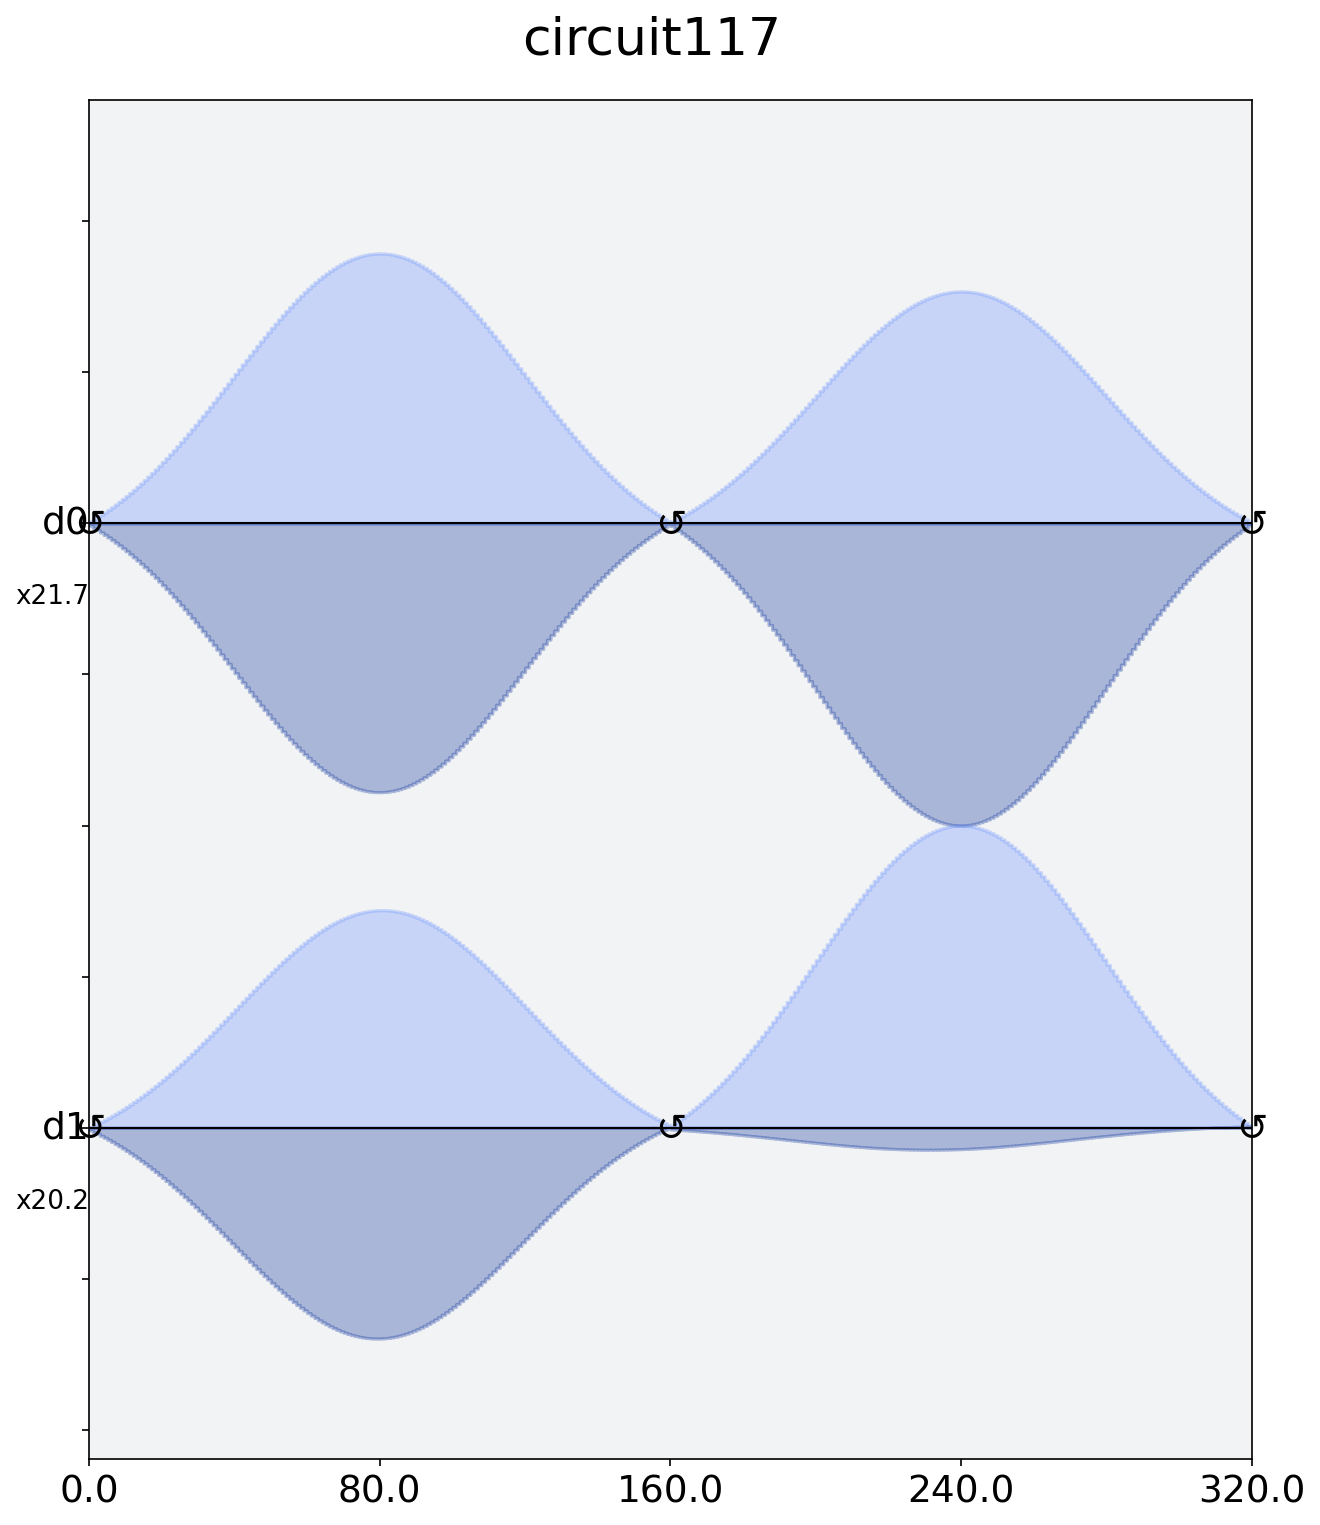

In [26]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from math import pi

qcirc = QuantumCircuit(3, 3)
qcirc.u3(330,pi/4,pi/4,0) ## Theta angle is Note E Frequency in Hz
qcirc.u3(392,pi/4,pi/4,1) ## Theta angle is Note G Frequency in Hz
qcirc.measure([0, 1], [0, 1])

schedule = build_schedule(qcirc, backend,
                          method="as_late_as_possible")
schedule.draw(channels=[pulse.DriveChannel(0), pulse.DriveChannel(1)])